***

<img src="assets/face_detection_cover.png" width="100%">
    
***

# Face Detection with Python, Google Vision API and google-vision-wrapper

### Introduction
In this quick tutorial we are going to show how to use google-vision-wrapper to perform face detection on images. Please refer to the [Official Github Page](https://github.com/gcgrossi/google-vision-wrapper) for more information.

### Before you begin
Before starting, it is mandatory to correctly setup a Google Cloud Project, authorise the Google Vision API and generate a .json API key file. Be sure to have fulfilled all the steps in the [Before you Begin Guide](https://cloud.google.com/vision/docs/before-you-begin) before moving on.

### Imports

In [1]:
# the main class
from gvision import GVisionAPI

#other imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read The input image
You can read the input image in the way you prefer, the class accepts 2 formats:
1. numpy.ndarray
2. bytes

The Google Vision API accepts images in bytes format. If you chose to go on with numpy array the wrapper will perform the conversion. I always chose to read the image using OpenCV.

In [2]:
#read the image from disk
img = cv2.imread(os.path.join(os.getcwd(),'images','frodo.png'))

we are going to use this image: 

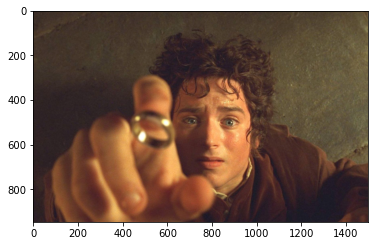

In [3]:
#show the image
#transform to RGB -> an OpenCV speciality
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

of Frodo, just a second before the Ring of Power will subtly slip on his finger.

### Initialize the class
```authfile``` is the path to your API key file in .json format.

In [4]:
# path to auth key file
authfile = os.path.join(os.getcwd(),'gvision_auth.json')
gvision = GVisionAPI(authfile)

### Perform a request
The method we are goin to use is: ```.perform_request(img,option)```. It accepts 2 parameters:
1. the image already loaded
2. an option that specifies what kind of request to make

You can access the possibile options in this two ways:

In [5]:
# method to print request options
gvision.request_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.request_types)

Possible Request Options: 
* face detection
* landmark detection
* logo detection
* object detection
* label detection
* image properties
* text detection
* handwriting detection
* web detection

Possible Options:
dict_keys(['face detection', 'landmark detection', 'logo detection', 'object detection', 'label detection', 'image properties', 'text detection', 'handwriting detection', 'web detection'])


We are ready to perform the actual request. The body of the response from the API can be accessed using the  ```.response``` attribute.

In [6]:
#perform a request to the API
gvision.perform_request(img,'face detection')

# print the response
print(gvision.response)

face_annotations {
  bounding_poly {
    vertices {
      x: 526
      y: 175
    }
    vertices {
      x: 1078
      y: 175
    }
    vertices {
      x: 1078
      y: 818
    }
    vertices {
      x: 526
      y: 818
    }
  }
  fd_bounding_poly {
    vertices {
      x: 573
      y: 314
    }
    vertices {
      x: 1031
      y: 314
    }
    vertices {
      x: 1031
      y: 764
    }
    vertices {
      x: 573
      y: 764
    }
  }
  landmarks {
    type_: LEFT_EYE
    position {
      x: 711.71295
      y: 494.07532
      z: 0.0001783371
    }
  }
  landmarks {
    type_: RIGHT_EYE
    position {
      x: 881.94556
      y: 496.9984
      z: -9.51236
    }
  }
  landmarks {
    type_: LEFT_OF_LEFT_EYEBROW
    position {
      x: 657.70886
      y: 454.04877
      z: 16.90604
    }
  }
  landmarks {
    type_: RIGHT_OF_LEFT_EYEBROW
    position {
      x: 751.98846
      y: 450.1511
      z: -33.992767
    }
  }
  landmarks {
    type_: LEFT_OF_RIGHT_EYEBROW
    position {
  

And it is quite verbose. 

### Obtaining the information as list
The information regarding the face detection can be accessed using different methods. In the following we are going to obtain the face and head bounding box and landmarks points in form of lists, with the correponding headers.

In [7]:
# obtaining face points
face_headers,face_pts = gvision.face()
print(face_headers)
print(face_pts)

# obtaining head points
head_headers,head_pts = gvision.head()
print(head_headers)
print(head_pts)

# obtaining landmarks points
land_headers,land_pts = gvision.face_landmarks()
print(land_headers)
print(land_pts)

['face1', 'face2', 'face3', 'face4']
[[(573, 314), (1031, 314), (1031, 764), (573, 764)]]
['head1', 'head2', 'head3', 'head4']
[[(526, 175), (1078, 175), (1078, 818), (526, 818)]]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36']
[[(711.7129516601562, 494.0753173828125), (881.945556640625, 496.9984130859375), (657.7088623046875, 454.04876708984375), (751.9884643554688, 450.1510925292969), (838.1832885742188, 448.7408447265625), (935.7223510742188, 456.4249572753906), (793.9056396484375, 484.17279052734375), (788.758544921875, 589.001708984375), (794.0109252929688, 651.6461791992188), (793.0731811523438, 703.9297485351562), (731.4522094726562, 667.5446166992188), (858.6494140625, 672.2739868164062), (795.5062255859375, 674.6854858398438), (843.29638671875, 606.9810180664062), (756.490966796875, 597.9932250976562), (795.6024169921875, 614.90240

Remember: for each face detected (there could be more than 1) a list of points is filled. I.e. the first face point are ```face_pts[0]```. As you can see, points are store as a 2-tuples, a calssical choice when dealing with a system of coordinates (x,y).

### Obtaining the information as pandas DataFrame
the same information can also de retrieved as a pandas DataFrame for convenience, using the method ```.to_df(option,name)```. It accepts 2 parameters:
1. an option, specifying the type of information to dump
2. the optional name or id of the image, that will be appended to each row of the DataFrame. Default is set to ```'image'```.

You can access the possible options in the two following ways:

In [8]:
# method to print df options
gvision.df_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.df_types)

Possible DataFrame Options: 
* face landmarks
* face
* head
* angles
* objects
* landmarks
* logo
* labels
* colors
* crop hints
* texts
* pages
* blocks
* paragraphs
* words
* symbols
* web entities
* matching images
* similar images

Possible Options:
dict_keys(['face landmarks', 'face', 'head', 'angles', 'objects', 'landmarks', 'logo', 'labels', 'colors', 'crop hints', 'texts', 'pages', 'blocks', 'paragraphs', 'words', 'symbols', 'web entities', 'matching images', 'similar images'])


Let's obtain the information.

In [9]:
# obtain the information as a pandas DataFrame
df_face  =gvision.to_df('face','poor_frodo')
df_face

,IMAGE_NAME,face1,face2,face3,face4
0,poor_frodo,"(573, 314)","(1031, 314)","(1031, 764)","(573, 764)"


In [10]:
# obtain the information as a pandas DataFrame
df_head  =gvision.to_df('head','poor_frodo')
df_head

,IMAGE_NAME,head1,head2,head3,head4
0,poor_frodo,"(526, 175)","(1078, 175)","(1078, 818)","(526, 818)"


In [11]:
# obtain the information as a pandas DataFrame
df_land  =gvision.to_df('face landmarks','poor_frodo')
df_land

,IMAGE_NAME,1,2,3,4,5,6,7,8,9,...,25,26,27,28,31,32,33,34,35,36
0,poor_frodo,"(711.7129516601562, 494.0753173828125)","(881.945556640625, 496.9984130859375)","(657.7088623046875, 454.04876708984375)","(751.9884643554688, 450.1510925292969)","(838.1832885742188, 448.7408447265625)","(935.7223510742188, 456.4249572753906)","(793.9056396484375, 484.17279052734375)","(788.758544921875, 589.001708984375)","(794.0109252929688, 651.6461791992188)",...,"(705.096435546875, 437.93377685546875)","(887.2174072265625, 437.7728271484375)","(621.1411743164062, 527.2894897460938)","(987.5260620117188, 544.8671875)","(792.5225830078125, 445.4039306640625)","(801.09765625, 774.556640625)","(663.28369140625, 679.8106689453125)","(947.96484375, 700.3831176757812)","(680.7007446289062, 605.7356567382812)","(910.029541015625, 610.579833984375)"


### Draw the results
You can now draw the results in the way you prefer. I will do it using OpenCV.

True

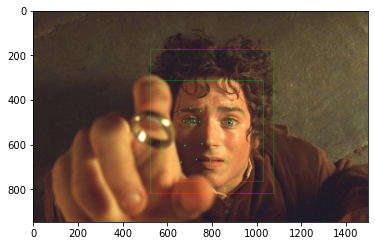

In [12]:
#copy the original image
#transform to RGB -> an OpenCV speciality
boxed = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# draw rectangles on the detected face
for pt in face_pts:
    tl,tr,br,bl = pt[0],pt[1],pt[2],pt[3]
    cv2.rectangle(boxed, (int(tl[0]),int(tl[1])), (int(br[0]),int(br[1])), (0, 255, 0), 1)

# draw rectangles on the detected head
for pt in head_pts:
    tl,tr,br,bl = pt[0],pt[1],pt[2],pt[3]
    cv2.rectangle(boxed, (int(tl[0]),int(tl[1])), (int(br[0]),int(br[1])), (0, 255, 0), 1)

# draw face landmarks
for face in land_pts:
    for pt in face: cv2.circle(boxed, (int(pt[0]), int(pt[1])), 3, (0, 255, 0), -1)

#show the image
plt.imshow(boxed)

# save to disk
output = cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(os.getcwd(),'assets','output_frodo.jpg'), output)

And there it is! Our (anti)hero Frodo has been catched by the eye of Sauron ... or is better to say by the eye of Google?  